<a href="https://colab.research.google.com/github/yamini0809/MI_ICP4/blob/main/ML_ipynb1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive',force_remount=True)

Mounted at /content/drive


In [6]:
#Importing the required libraried to perform the given tasks

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from sklearn.impute import SimpleImputer
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
import seaborn as sns

# 1. Principal Component Analysis
    a. Apply PCA on CC dataset.
    b. Apply k-means algorithm on the PCA result and report your observation if the silhouette score
       has improved or not?
    c. Perform Scaling+PCA+K-Means and report performance.

In [7]:
#Loading the dataset

cc_dataset=pd.read_csv('CC.csv')
cc_dataset.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [8]:
#Applying the imputer to the dataset to fill the null values that will prevent the PCA

X = cc_dataset.iloc[:,1:]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)
X = imputer.transform(X)
X=pd.DataFrame(X)

In [9]:
#a. Apply PCA on CC dataset

pca = PCA(2)
x_pca = pca.fit_transform(X)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2, X.iloc[:,-1]], axis=1)
finaldf.head()

,0,1,16
0,-4326.383956,921.566884,12.0
1,4118.916676,-2432.846347,12.0
2,1497.907660,-1997.578692,12.0
3,1394.548556,-1488.743450,12.0
4,-3743.351874,757.342659,12.0


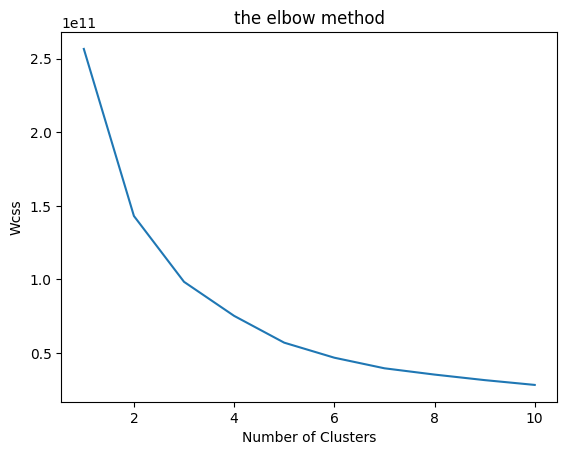

In [10]:
#Performing the elbow method to find the best number of suitable clusters for the given data to implement k-means
wcss = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i,init='k-means++',max_iter=300,n_init=10,random_state=0)
    kmeans.fit(finaldf)
    wcss.append(kmeans.inertia_)

plt.plot(range(1,11),wcss)
plt.title('the elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('Wcss')
plt.show()

In [11]:
# Apply k-means algorithm on the PCA result and report your observation if the silhouette score has improved or not?

nclusters = 4
km = KMeans(n_clusters=nclusters)
km.fit(finaldf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [12]:
y_cluster_kmeans = km.predict(finaldf)
score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
print('Silhoutte score for just PCA:',score)

Silhoutte score for just PCA: 0.5025137537334639


In [13]:
#Reload the dataset again
X = cc_dataset.iloc[:,1:]

imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
imputer = imputer.fit(X)

X = imputer.transform(X)

print(X)
X=pd.DataFrame(X)

[[4.09007490e+01 8.18182000e-01 9.54000000e+01 ... 1.39509787e+02
  0.00000000e+00 1.20000000e+01]
 [3.20246742e+03 9.09091000e-01 0.00000000e+00 ... 1.07234022e+03
  2.22222000e-01 1.20000000e+01]
 [2.49514886e+03 1.00000000e+00 7.73170000e+02 ... 6.27284787e+02
  0.00000000e+00 1.20000000e+01]
 ...
 [2.33986730e+01 8.33333000e-01 1.44400000e+02 ... 8.24183690e+01
  2.50000000e-01 6.00000000e+00]
 [1.34575640e+01 8.33333000e-01 0.00000000e+00 ... 5.57556280e+01
  2.50000000e-01 6.00000000e+00]
 [3.72708075e+02 6.66667000e-01 1.09325000e+03 ... 8.82889560e+01
  0.00000000e+00 6.00000000e+00]]


In [14]:
#Apply scaling on the dataset

scaler = StandardScaler()
scaler.fit(X)
x_scaler = scaler.transform(X)

#Apply PCA with k value as 2 again

pca = PCA(2)
x_pca = pca.fit_transform(x_scaler)
df2 = pd.DataFrame(data=x_pca)
finaldf = pd.concat([df2,cc_dataset[['TENURE']]],axis=1)
print(finaldf)

             0         1  TENURE
0    -1.682219 -1.076459      12
1    -1.138292  2.506425      12
2     0.969675 -0.383405      12
3    -0.873627  0.043158      12
4    -1.599433 -0.688586      12
...        ...       ...     ...
8945 -0.359626 -2.016174       6
8946 -0.564367 -1.639138       6
8947 -0.926201 -1.810814       6
8948 -2.336549 -0.657987       6
8949 -0.556426 -0.400430       6

[8950 rows x 3 columns]


In [22]:
#Apply k-means on the scaled PCA output
#Apply k-means on the scaled PCA output

# Apply k-means on the scaled PCA output

nclusters = 4
km = KMeans(n_clusters=nclusters)

# Convert all column names in finaldf to strings
finaldf.columns = finaldf.columns.astype(str)  # This line fixes the error

km.fit(finaldf)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=4)

In [23]:
y_cluster_kmeans = km.predict(finaldf)
score = metrics.silhouette_score(finaldf, y_cluster_kmeans)
print('Silhoutte score for scaled=pca=keans:',score)

Silhoutte score for scaled=pca=keans: 0.4378870895733071


#Observation:
    
 The score is reduced after performing the PCa, so this data need not to be undergone with PCA.

# 2. Use pd_speech_features.csv
    a. Perform Scaling
    b. Apply PCA (k=3)
    c. Use SVM to report performance

In [25]:
#Load the dataset

speech_df=pd.read_csv('pd_speech_features.csv')
speech_df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [26]:
#Apply scaling on the dataset

x =speech_df.iloc[:,1:]
scaler = StandardScaler()
scaler.fit(x)
speech_x_scaler = scaler.transform(x)

#Apply PCA with value 3

pca = PCA(3)
speech_x_pca = pca.fit_transform(speech_x_scaler)
speech_df2 = pd.DataFrame(data=speech_x_pca)
speech_finaldf = pd.concat([speech_df2,speech_df[['class']]],axis=1)
print(speech_finaldf)

             0         1          2  class
0   -10.052430  1.476819  -6.828357      1
1   -10.641066  1.590407  -6.811682      1
2   -13.520081 -1.243923  -6.794533      1
3    -9.142525  8.848867  15.300270      1
4    -6.758090  4.624218  15.645656      1
..         ...       ...        ...    ...
751  22.377450  6.470190   1.439463      0
752  13.503270  1.450489   9.344879      0
753   8.328507  2.392514  -0.911240      0
754   4.074595  5.417627  -0.847072      0
755   4.052810  6.076465  -2.022289      0

[756 rows x 4 columns]


In [27]:
#Apply SVM classifier

clf = SVC(kernel='linear')
x =speech_finaldf.iloc[:,:-1]
y =speech_finaldf.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=42)
clf.fit(X_train, y_train)
y_pred=clf.predict(X_test)
accuracy_score(y_test, y_pred)
print("SVM accuracy =", accuracy_score(y_test, y_pred))

SVM accuracy = 0.768


In [28]:
#Classification report for the above classifier

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.20      0.33        69
           1       0.76      0.98      0.86       181

    accuracy                           0.77       250
   macro avg       0.79      0.59      0.59       250
weighted avg       0.78      0.77      0.71       250



# 3. Apply Linear Discriminant Analysis (LDA) on Iris.csv dataset to reduce dimensionality of data to k=2

In [30]:
#Load the IRIS dataset

iris_df = pd.read_csv("Iris.csv")
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [31]:
#apply the standard scaling

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(iris_df.iloc[:,:-1].values)

#Label encoding the species column
class_le = LabelEncoder()
y = class_le.fit_transform(iris_df['Species'].values)

#Applying LDA on the Datset

lda = LinearDiscriminantAnalysis(n_components=2)
X_train_lda = lda.fit_transform(X_train_std,y)

data=pd.DataFrame(X_train_lda)
data['class']=y
data.columns=["LD1","LD2","class"]
data.head()

,LD1,LD2,class
0,-10.036763,-0.451330,0
1,-9.172930,-1.477234,0
2,-9.480989,-0.979693,0
3,-8.818119,-1.408602,0
4,-9.960200,-0.112546,0


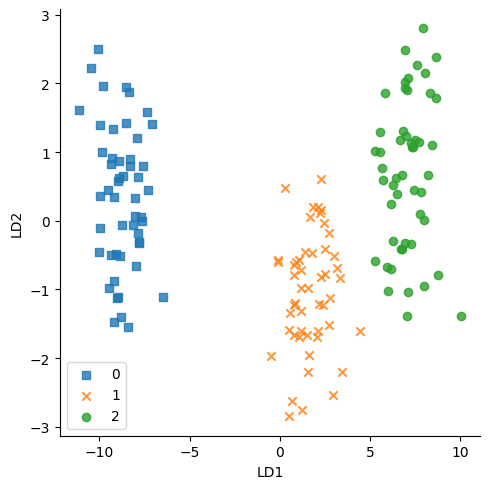

In [32]:
markers = ['s', 'x', 'o']
colors = ['y', 'b', 'g']
sns.lmplot(x="LD1", y="LD2", data=data, hue='class', markers=markers, fit_reg=False, legend=False)
plt.legend()
plt.show()

# 4. Briefly identify the difference between PCA and LDA

Answer: PCA performs better in case where number of samples per class is less. Whereas LDA works better with large dataset having      multiple classes; class separability is an important factor while reducing dimensionality. PCA finds directions of maximum      variance regardless of class labels while LDA finds directions of maximum class separability.